In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def simulate_brownien_motion(mean = 0, T = 1, delta_t = 0.01 ):

    t = np.arange(0,T, delta_t) # time axis

    delta_y = np.random.normal(loc = mean, scale = np.sqrt(delta_t), size=len(t)-1) 

    y = np.zeros(len(t))
    temp = 0
    for i in range(y.shape[0]-1):
        y[i+1] = y[i] + delta_y[i] 

    return t, y

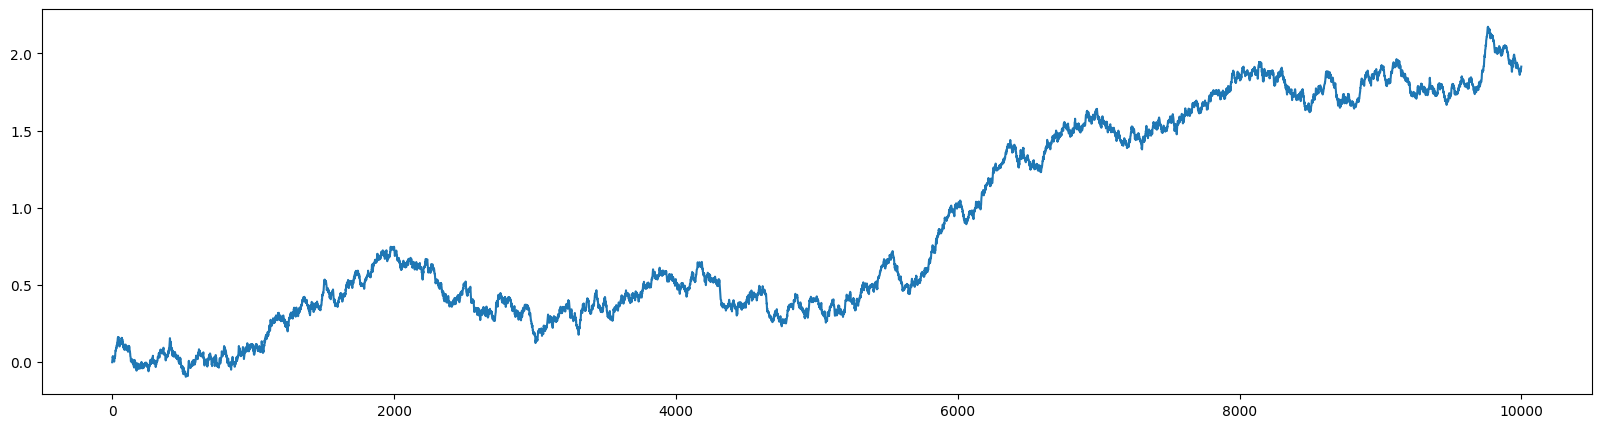

In [5]:
t, y = simulate_brownien_motion(delta_t = 0.0001)
plt.figure(figsize=(20,5)) 
plt.plot(y)

### The paper deals with diffusion first exit times : 
The fisrt time a stochastic process exits a given domain (real interval in case of unidimensionnal process)
As this is random, the objective is to simulate the distribution of this first time exit.

**The purpose of the paper is to highlight an acceleration procedure for <br> the GDET-algorithm based
on a multi-armed bandit model.**